In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

HOME = os.path.expanduser('~')
card = pd.read_csv(HOME + '/temp/creditcard.csv')
card

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [2]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
    copy = df.copy()
    copy.drop('Time', axis=1, inplace=True)
    return copy

def get_train_test_dataset(df=None):
    copy = get_preprocessed_df(df)
    x_features = copy.iloc[:, :-1]
    y_target = copy.iloc[:, -1]
    
    x_train, x_test, y_train, y_test = \
        train_test_split(x_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    return x_train, x_test, y_train, y_test

In [3]:
x_train, x_test, y_train, y_test = get_train_test_dataset(card)

In [4]:
y_train.value_counts() / y_train.shape[0]

0    0.998275
1    0.001725
Name: Class, dtype: float64

In [5]:
y_test.value_counts() / y_test.shape[0]

0    0.998268
1    0.001732
Name: Class, dtype: float64

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f} F1: {3:.4f}, AUC:{4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))

In [7]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
prob = lr.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, pred, prob)

오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081 F1: 0.7143, AUC:0.9517


In [8]:
def get_model_train_eval(model, feature_train, feature_test, target_train, target_test):
    model.fit(feature_train, target_train)
    pred = model.predict(feature_test)
    prob = model.predict_proba(feature_test)[:, 1]
    get_clf_eval(target_test, pred, prob)

In [9]:
lr.predict_proba(x_test)

array([[9.98636014e-01, 1.36398604e-03],
       [9.99820746e-01, 1.79254438e-04],
       [9.99745573e-01, 2.54426708e-04],
       ...,
       [9.99815844e-01, 1.84155695e-04],
       [9.99333979e-01, 6.66020921e-04],
       [9.99883222e-01, 1.16778366e-04]])

In [10]:
lr.predict_proba(x_test)[:, 1]

array([0.00136399, 0.00017925, 0.00025443, ..., 0.00018416, 0.00066602,
       0.00011678])

In [11]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm, x_train, x_test, y_train, y_test)

오차 행렬
[[85289     6]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9492, 재현율: 0.7568 F1: 0.8421, AUC:0.9797


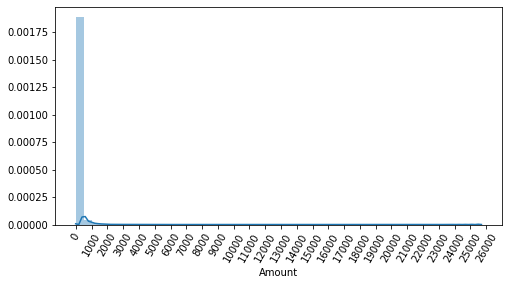

In [12]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card['Amount'])

In [13]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    copy = df.copy()
    scaler = StandardScaler()
    amount = scaler.fit_transform(copy['Amount'].values.reshape(-1, 1))
    copy.insert(0, 'Amount_Scaled', amount)
    copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return copy

In [14]:
x_train, x_test, y_train, y_test = get_train_test_dataset(card)

lr = LogisticRegression()
get_model_train_eval(lr, x_train, x_test, y_train, y_test)

오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081 F1: 0.7143, AUC:0.9702


In [15]:
get_model_train_eval(lgbm, x_train, x_test, y_train, y_test)

오차 행렬
[[85289     6]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9492, 재현율: 0.7568 F1: 0.8421, AUC:0.9773


In [16]:
def get_preprocessed_df(df=None):
    copy = df.copy()
    amount = np.log1p(copy['Amount'])
    copy.insert(0, 'Amount_Scaled', amount)
    copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return copy

In [17]:
x_train, x_test, y_train, y_test = get_train_test_dataset(card)
get_model_train_eval(lr, x_train, x_test, y_train, y_test)

오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014 F1: 0.7149, AUC:0.9727


In [18]:
get_model_train_eval(lgbm, x_train, x_test, y_train, y_test)

오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635 F1: 0.8496, AUC:0.9786


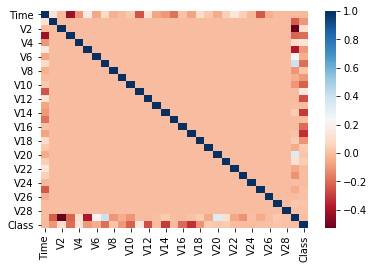

In [19]:
plt.figure()
corr = card.corr()
sns.heatmap(corr, cmap='RdBu')

In [20]:
def get_outlier(df=None, column=None, weigth=1.5):
    fraud = df[df['Class']==1][column]
    q25 = np.percentile(fraud.values, 25)
    q75 = np.percentile(fraud.values, 75)
    
    iqr = q75 - q25
    iqr_weight = iqr * weigth
    lowest = q25 - iqr_weight
    highest = q75 + iqr_weight
    
    outlier = fraud[(fraud < lowest) | (fraud > highest)].index
    return outlier

In [21]:
index = get_outlier(df=card, column='V14', weigth=1.5)
index

Int64Index([8296, 8615, 9035, 9252], dtype='int64')

In [22]:
def get_preprocessed_df(df=None):
    copy = df.copy()
    amount = np.log1p(copy['Amount'])
    copy.insert(0, 'Amount_Scaled', amount)
    copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    index = get_outlier(copy, 'V14')
    copy.drop(index, axis=0, inplace=True)
    return copy

In [23]:
x_train, x_test, y_train, y_test = get_train_test_dataset(card)
lr = LogisticRegression()
get_model_train_eval(lr, x_train, x_test, y_train, y_test)

오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712 F1: 0.7597, AUC:0.9743


In [24]:
lgbm = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm, x_train, x_test, y_train, y_test)

오차 행렬
[[85291     4]
 [   25   121]]
정확도: 0.9997, 정밀도: 0.9680, 재현율: 0.8288 F1: 0.8930, AUC:0.9831


In [25]:
import sklearn
sklearn.__version__

'0.23.1'

In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
x_train_over, y_train_over = smote.fit_sample(x_train, y_train)
print(x_train.shape, y_train.shape)
print(x_train_over.shape, y_train_over.shape)

(199362, 29) (199362,)
(398040, 29) (398040,)


In [27]:
lr = LogisticRegression()
get_model_train_eval(lr, x_train_over, x_test, y_train_over, y_test)

오차 행렬
[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.9247 F1: 0.1023, AUC:0.9737


In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)

    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

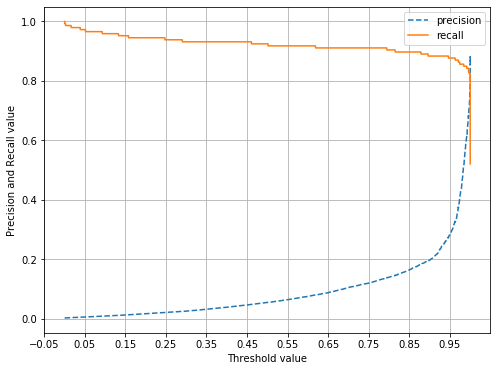

In [29]:
precision_recall_curve_plot(y_test, lr.predict_proba(x_test)[:, 1])

In [30]:
lgbm = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm, x_train_over, x_test, y_train_over, y_test)

오차 행렬
[[85286     9]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9323, 재현율: 0.8493 F1: 0.8889, AUC:0.9789
